In [1]:
import numpy as np
import matplotlib.pyplot as plt
from regions import Regions
import regions
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.modeling import models, fitting

from dust_extinction.averages import CT06_MWGC

from smart_plotters.jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
from smart_plotters.cutout_plot import get_cutout_405, get_cutout_jwst_ice
import smart_plotters.co_ice as co_map
from smart_plotters import cmd_plot 

In [2]:
cat_brick = make_brick_cat()

Reading /orange/adamginsburg/jwst/brick/catalogs/basic_merged_indivexp_photometry_tables_merged_qualcuts_oksep2221.fits


In [3]:
def get_rc_sel_mask(cat):
    x = np.linspace(0, 2.5, 10)
    
    x0 = 0.52
    mask_x0_left = cat.color('f182m', 'f212n') > x0

    y0 = 14.8
    mask_above_y0 = cat.band('f182m') > y0
    mask_rc = mask_above_y0 & mask_x0_left

    pt1 = (0.5, 14.3)
    pt2 = (2.0, 20.)
    y1 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
    mask_below_y1 = cat.band('f182m') > ( (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (cat.color('f182m', 'f212n') - pt1[0]) + pt1[1] )
    mask_rc = mask_below_y1 & mask_rc

    pt1 = (0.5, 15.5)
    pt2 = (2.0, 20.9)
    y2 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
    mask_above_y2 = cat.band('f182m') < ( (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (cat.color('f182m', 'f212n') - pt1[0]) + pt1[1] )
    mask_rc = mask_rc & mask_above_y2

    return mask_rc

In [4]:
cat_brick_rc = JWSTCatalog(cat_brick.catalog[get_rc_sel_mask(cat_brick)])

In [5]:
ls /orange/adamginsburg/jwst/cloudc/regions_/brick*.reg

/orange/adamginsburg/jwst/cloudc/regions_/brick_fil.reg
/orange/adamginsburg/jwst/cloudc/regions_/brick_head.reg
/orange/adamginsburg/jwst/cloudc/regions_/brick_nclear.reg
/orange/adamginsburg/jwst/cloudc/regions_/brick_nfluff.reg
/orange/adamginsburg/jwst/cloudc/regions_/brick_north.reg
/orange/adamginsburg/jwst/cloudc/regions_/brick_punch.reg
/orange/adamginsburg/jwst/cloudc/regions_/brick_sfluff.reg
/orange/adamginsburg/jwst/cloudc/regions_/brick_sfore.reg
/orange/adamginsburg/jwst/cloudc/regions_/brick_sfr.reg
/orange/adamginsburg/jwst/cloudc/regions_/brick_sfr_tight.reg
/orange/adamginsburg/jwst/cloudc/regions_/brick_south.reg
/orange/adamginsburg/jwst/cloudc/regions_/brick_test.reg
/orange/adamginsburg/jwst/cloudc/regions_/brick_topc.reg
/orange/adamginsburg/jwst/cloudc/regions_/brick_topL.reg


In [6]:
reg_brick_north = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/brick_north.reg')
reg_brick_south = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/brick_south.reg')
reg_brick_head = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/brick_head.reg')
reg_brick_sfluff = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/brick_sfluff.reg')
reg_brick_nfluff = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/brick_nfluff.reg')
reg_brick_sfr = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/brick_sfr_tight.reg')
reg_brick_sfrwide = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/brick_sfr.reg')
reg_brick_punch = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/brick_punch.reg')
reg_brick_sfore = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/brick_sfore.reg')
reg_brick_nclear = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/brick_nclear.reg')
#reg_brick_topL = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/brick_topL.reg')
reg_brick_topc = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/brick_topc.reg')
#reg_brick_fil = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/brick_fil.reg')

In [7]:
fn_brick = '/orange/adamginsburg/jwst/brick/F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-merged_i2d.fits'
hdu_brick = fits.open(fn_brick)
ww_brick = WCS(hdu_brick['SCI'].header)
nanfield_brick = np.nan * hdu_brick['SCI'].data

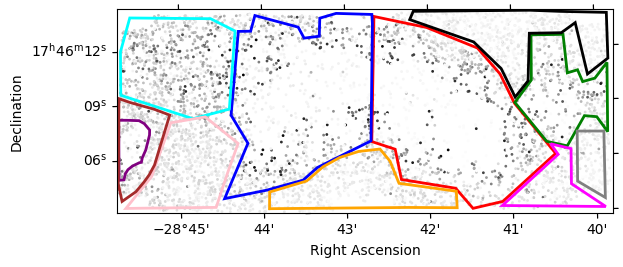

In [30]:
ax = plt.subplot(projection=ww_brick)
plt.imshow(nanfield_brick)
cat_brick_rc.plot_position(ax=ax, transform=ax.get_transform('world'), s=1, cmap='Greys', c=cat_brick_rc.color('f182m', 'f212n'))

reg_brick_north[0].to_pixel(ww_brick).plot(ax=ax, facecolor='none', edgecolor='red')
reg_brick_south[0].to_pixel(ww_brick).plot(ax=ax, facecolor='none', edgecolor='blue')
reg_brick_head[0].to_pixel(ww_brick).plot(ax=ax, facecolor='none', edgecolor='green')
reg_brick_sfluff[0].to_pixel(ww_brick).plot(ax=ax, facecolor='none', edgecolor='cyan')
reg_brick_nfluff[0].to_pixel(ww_brick).plot(ax=ax, facecolor='none', edgecolor='magenta')
reg_brick_sfr[0].to_pixel(ww_brick).plot(ax=ax, facecolor='none', edgecolor='purple')
reg_brick_punch[0].to_pixel(ww_brick).plot(ax=ax, facecolor='none', edgecolor='orange')
reg_brick_sfore[0].to_pixel(ww_brick).plot(ax=ax, facecolor='none', edgecolor='pink')
reg_brick_nclear[0].to_pixel(ww_brick).plot(ax=ax, facecolor='none', edgecolor='k')
#reg_brick_topL[0].to_pixel(ww_brick).plot(ax=ax, facecolor='none', edgecolor='brown')
reg_brick_topc[0].to_pixel(ww_brick).plot(ax=ax, facecolor='none', edgecolor='gray')
#reg_brick_fil[0].to_pixel(ww_brick).plot(ax=ax, facecolor='none', edgecolor='lime')
reg_brick_sfrwide[0].to_pixel(ww_brick).plot(ax=ax, facecolor='none', edgecolor='brown')

In [9]:
cat_brick_north = JWSTCatalog(cat_brick.table_region_mask(reg_brick_north, ww_brick)) #  
cat_brick_south = JWSTCatalog(cat_brick.table_region_mask(reg_brick_south, ww_brick))
cat_brick_head = JWSTCatalog(cat_brick.table_region_mask(reg_brick_head, ww_brick))
cat_brick_sfluff = JWSTCatalog(cat_brick.table_region_mask(reg_brick_sfluff, ww_brick))
cat_brick_nfluff = JWSTCatalog(cat_brick.table_region_mask(reg_brick_nfluff, ww_brick))
cat_brick_sfr = JWSTCatalog(cat_brick.table_region_mask(reg_brick_sfr, ww_brick))
cat_brick_punch = JWSTCatalog(cat_brick.table_region_mask(reg_brick_punch, ww_brick))
cat_brick_sfore = JWSTCatalog(cat_brick.table_region_mask(reg_brick_sfore, ww_brick))
cat_brick_nclear = JWSTCatalog(cat_brick.table_region_mask(reg_brick_nclear, ww_brick))
#cat_brick_topL = JWSTCatalog(cat_brick.table_region_mask(reg_brick_topL, ww_brick))
cat_brick_topc = JWSTCatalog(cat_brick.table_region_mask(reg_brick_topc, ww_brick))
#cat_brick_fil = JWSTCatalog(cat_brick.table_region_mask(reg_brick_fil, ww_brick))
cat_brick_sfrwide = JWSTCatalog(cat_brick.table_region_mask(reg_brick_sfrwide, ww_brick))

In [10]:
cat_brick_north_rc = JWSTCatalog(cat_brick_rc.table_region_mask(reg_brick_north, ww_brick)) #  
cat_brick_south_rc = JWSTCatalog(cat_brick_rc.table_region_mask(reg_brick_south, ww_brick))
cat_brick_head_rc = JWSTCatalog(cat_brick_rc.table_region_mask(reg_brick_head, ww_brick))
cat_brick_sfluff_rc = JWSTCatalog(cat_brick_rc.table_region_mask(reg_brick_sfluff, ww_brick))
cat_brick_nfluff_rc = JWSTCatalog(cat_brick_rc.table_region_mask(reg_brick_nfluff, ww_brick))
cat_brick_sfr_rc = JWSTCatalog(cat_brick_rc.table_region_mask(reg_brick_sfr, ww_brick))
cat_brick_punch_rc = JWSTCatalog(cat_brick_rc.table_region_mask(reg_brick_punch, ww_brick))
cat_brick_sfore_rc = JWSTCatalog(cat_brick_rc.table_region_mask(reg_brick_sfore, ww_brick))
cat_brick_nclear_rc = JWSTCatalog(cat_brick_rc.table_region_mask(reg_brick_nclear, ww_brick))
#cat_brick_topL_rc = JWSTCatalog(cat_brick_rc.table_region_mask(reg_brick_topL, ww_brick))
cat_brick_topc_rc = JWSTCatalog(cat_brick_rc.table_region_mask(reg_brick_topc, ww_brick))
#cat_brick_fil_rc = JWSTCatalog(cat_brick_rc.table_region_mask(reg_brick_fil, ww_brick))
cat_brick_sfrwide_rc = JWSTCatalog(cat_brick_rc.table_region_mask(reg_brick_sfrwide, ww_brick))

# Red Clump

<WCSAxes: >

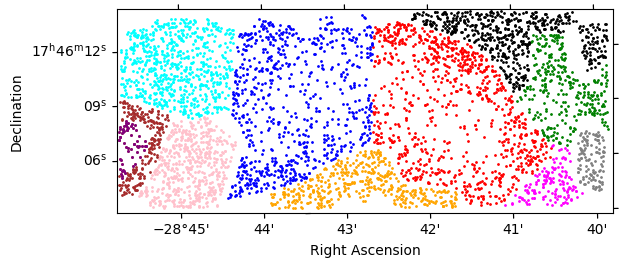

In [11]:
ax = plt.subplot(projection=ww_brick)
plt.imshow(nanfield_brick)

cat_brick_north_rc.plot_position(ax=ax, color='red', s=1, label='North', transform=ax.get_transform('world'))
cat_brick_south_rc.plot_position(ax=ax, color='blue', s=1, label='South', transform=ax.get_transform('world'))
cat_brick_head_rc.plot_position(ax=ax, color='green', s=1, label='Head', transform=ax.get_transform('world'))
cat_brick_sfluff_rc.plot_position(ax=ax, color='cyan', s=1, label='South Fluff', transform=ax.get_transform('world'))
cat_brick_nfluff_rc.plot_position(ax=ax, color='magenta', s=1, label='North Fluff', transform=ax.get_transform('world'))
cat_brick_punch_rc.plot_position(ax=ax, color='orange', s=1, label='Punch', transform=ax.get_transform('world'))
cat_brick_sfore_rc.plot_position(ax=ax, color='pink', s=1, label='South Foreground', transform=ax.get_transform('world'))
cat_brick_nclear_rc.plot_position(ax=ax, color='k', s=1, label='North Clear', transform=ax.get_transform('world'))
cat_brick_sfrwide_rc.plot_position(ax=ax, color='brown', s=1, label='Star Forming Region Wide', transform=ax.get_transform('world'))
cat_brick_sfr_rc.plot_position(ax=ax, color='purple', s=1, label='Star Forming Region', transform=ax.get_transform('world'))
cat_brick_topc_rc.plot_position(ax=ax, color='gray', s=1, label='Top Center', transform=ax.get_transform('world'))


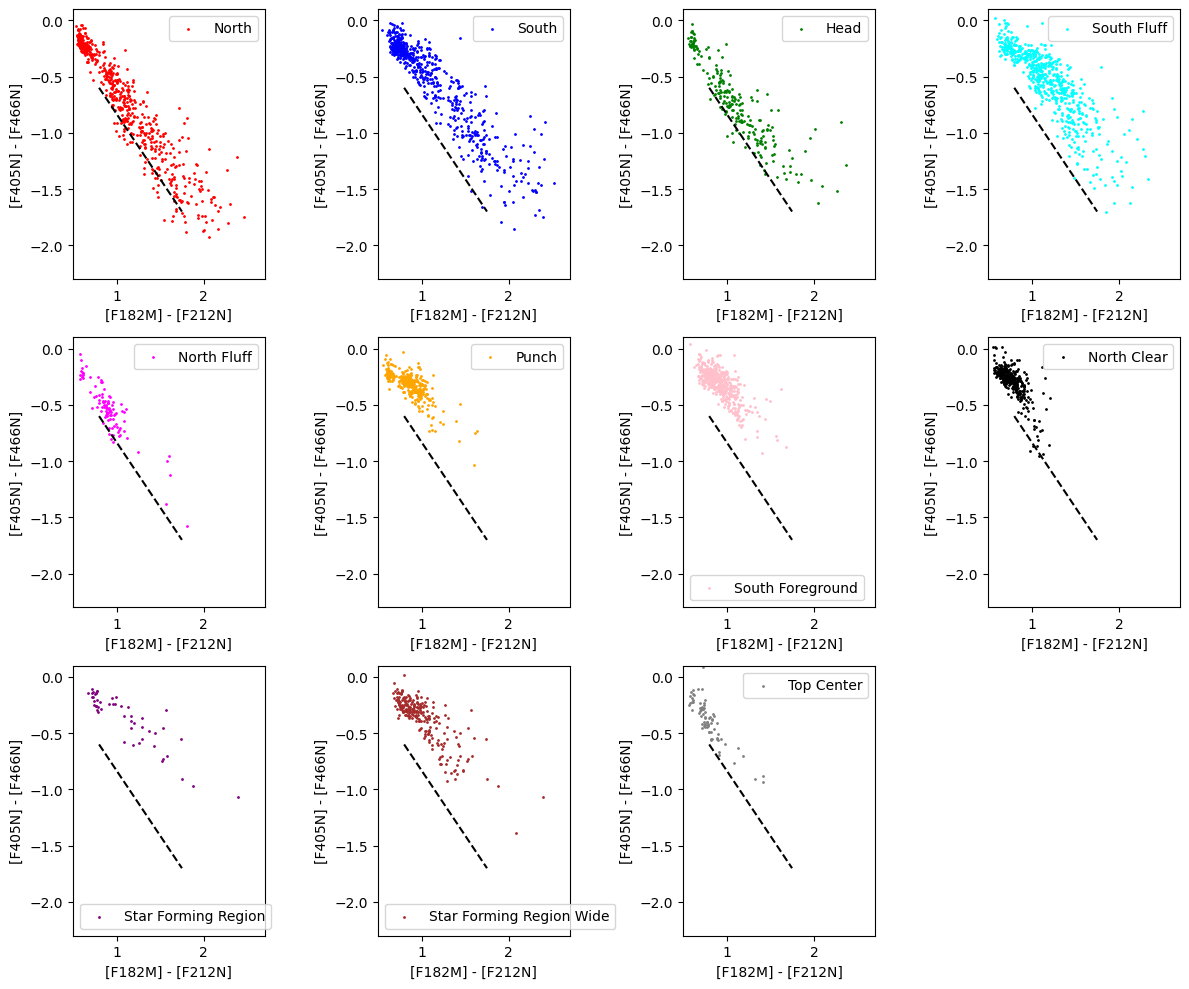

In [12]:
fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot(341)
cat_brick_north_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='red', s=1, label='North', ax=ax1)

ax2 = plt.subplot(342)
cat_brick_south_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='blue', s=1, label='South', ax=ax2)

ax3 = plt.subplot(343)
cat_brick_head_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='green', s=1, label='Head', ax=ax3)

ax4 = plt.subplot(344)
cat_brick_sfluff_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='cyan', s=1, label='South Fluff', ax=ax4)

ax5 = plt.subplot(345)
cat_brick_nfluff_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='magenta', s=1, label='North Fluff', ax=ax5)

ax6 = plt.subplot(346)
cat_brick_punch_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='orange', s=1, label='Punch', ax=ax6)

ax7 = plt.subplot(347)
cat_brick_sfore_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='pink', s=1, label='South Foreground', ax=ax7)

ax8 = plt.subplot(348)
cat_brick_nclear_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='k', s=1, label='North Clear', ax=ax8)

ax9 = plt.subplot(349)
cat_brick_sfr_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='purple', s=1, label='Star Forming Region', ax=ax9)

ax10 = plt.subplot(3,4,10)
cat_brick_sfrwide_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='brown', s=1, label='Star Forming Region Wide', ax=ax10)

#ax11 = plt.subplot(3,4,11)
#cat_brick_topL_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='brown', s=1, label='Top Left', ax=ax11)

ax11 = plt.subplot(3,4,11)
cat_brick_topc_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='gray', s=1, label='Top Center', ax=ax11)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]#, ax12]
for ax in axes:
    plt.sca(ax)
    plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
    ax.set_xlim(0.5, 2.7)
    ax.set_ylim(-2.3, 0.1)
    plt.legend()

plt.tight_layout()

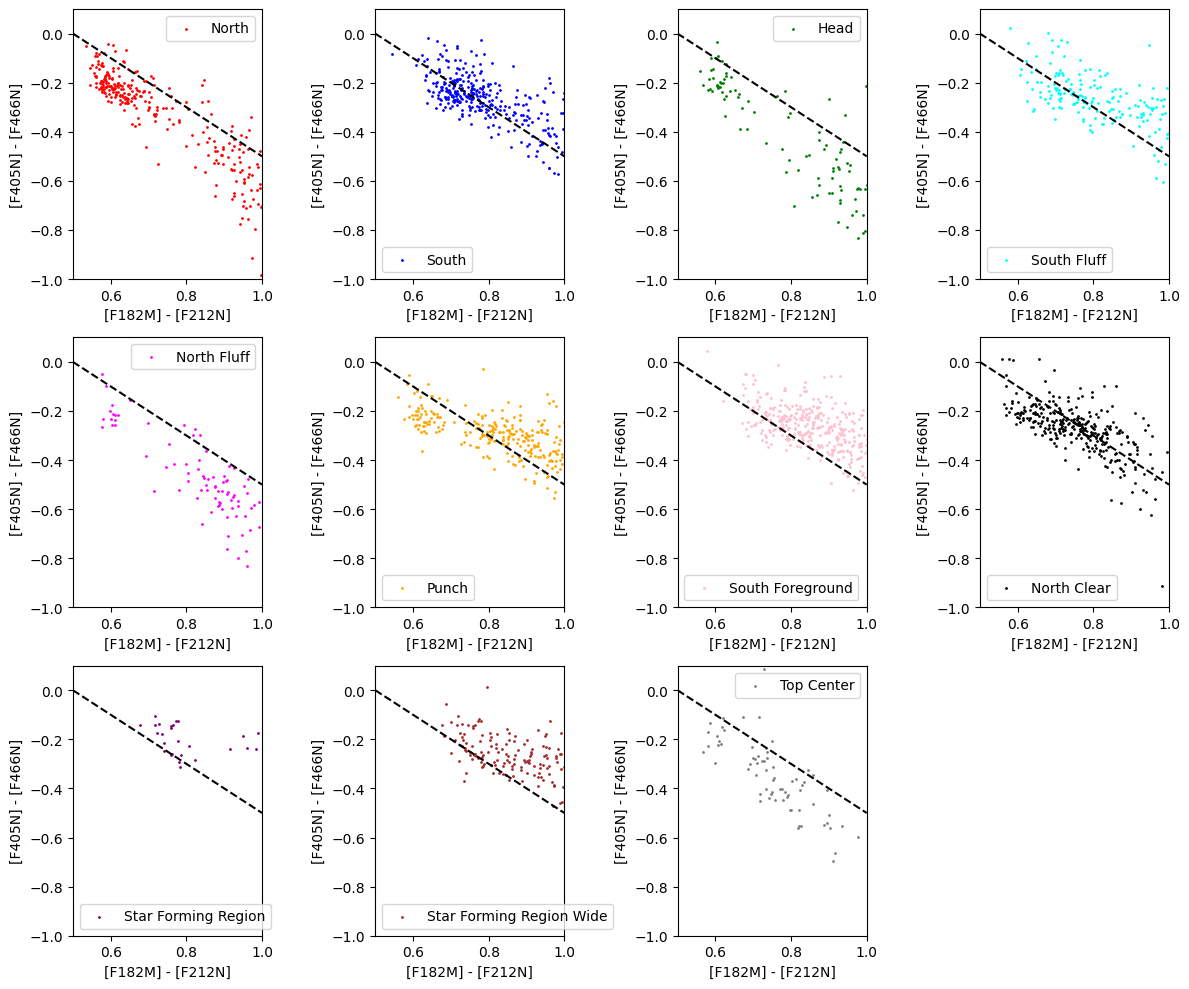

In [29]:
fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot(341)
cat_brick_north_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='red', s=1, label='North', ax=ax1)

ax2 = plt.subplot(342)
cat_brick_south_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='blue', s=1, label='South', ax=ax2)

ax3 = plt.subplot(343)
cat_brick_head_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='green', s=1, label='Head', ax=ax3)

ax4 = plt.subplot(344)
cat_brick_sfluff_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='cyan', s=1, label='South Fluff', ax=ax4)

ax5 = plt.subplot(345)
cat_brick_nfluff_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='magenta', s=1, label='North Fluff', ax=ax5)

ax6 = plt.subplot(346)
cat_brick_punch_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='orange', s=1, label='Punch', ax=ax6)

ax7 = plt.subplot(347)
cat_brick_sfore_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='pink', s=1, label='South Foreground', ax=ax7)

ax8 = plt.subplot(348)
cat_brick_nclear_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='k', s=1, label='North Clear', ax=ax8)

ax9 = plt.subplot(349)
cat_brick_sfr_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='purple', s=1, label='Star Forming Region', ax=ax9)

ax10 = plt.subplot(3,4,10)
cat_brick_sfrwide_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='brown', s=1, label='Star Forming Region Wide', ax=ax10)

#ax11 = plt.subplot(3,4,11)
#cat_brick_topL_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='brown', s=1, label='Top Left', ax=ax11)

ax11 = plt.subplot(3,4,11)
cat_brick_topc_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='gray', s=1, label='Top Center', ax=ax11)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]#, ax12]
for ax in axes:
    plt.sca(ax)
    plt.plot([0.5, 1.], [-0, -0.5], color='k', linestyle='dashed')
    ax.set_xlim(0.5, 1)
    ax.set_ylim(-1, 0.1)
    plt.legend()

plt.tight_layout()

<WCSAxes: >

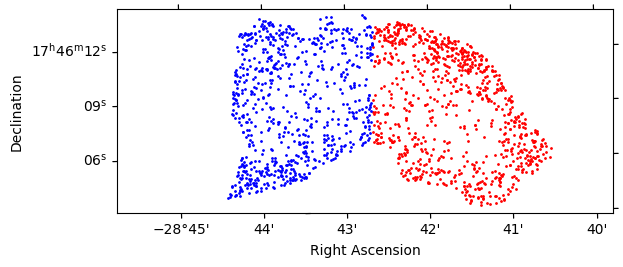

In [13]:
ax = plt.subplot(projection=ww_brick)
plt.imshow(nanfield_brick)

cat_brick_north_rc.plot_position(ax=ax, color='red', s=1, label='North', transform=ax.get_transform('world'))
cat_brick_south_rc.plot_position(ax=ax, color='blue', s=1, label='South', transform=ax.get_transform('world'))

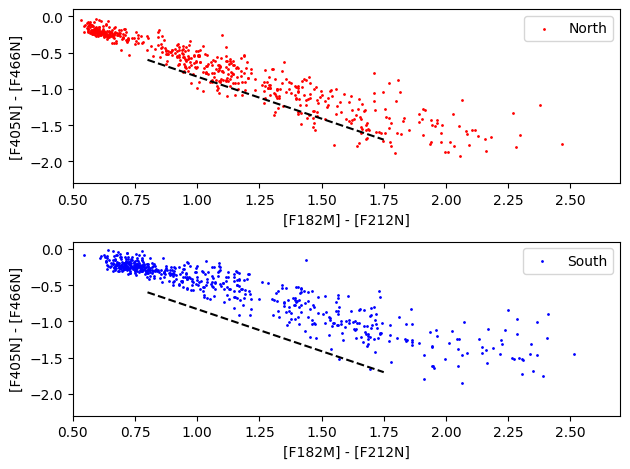

In [14]:
ax1 = plt.subplot(211)
cat_brick_north_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='red', s=1, label='North', ax=ax1)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax1.set_xlim(0.5, 2.7)
ax1.set_ylim(-2.3, 0.1)
plt.legend()

ax2 = plt.subplot(212)
cat_brick_south_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='blue', s=1, label='South', ax=ax2)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax2.set_xlim(0.5, 2.7)
ax2.set_ylim(-2.3, 0.1)
plt.legend()

plt.tight_layout()

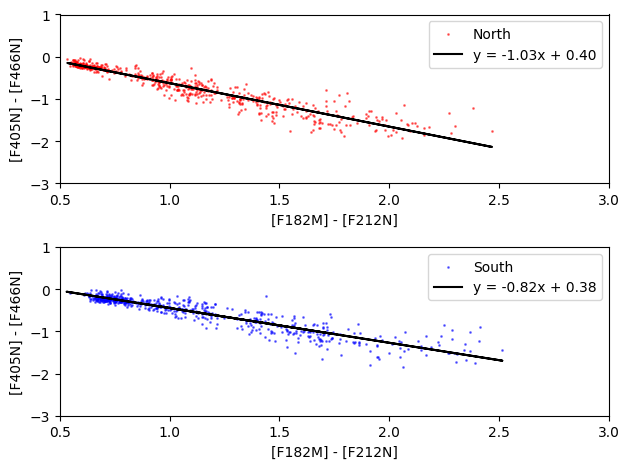

In [15]:
# initialize a linear fitter
fit = fitting.LinearLSQFitter()

small_lim = 0.5

mask = cat_brick_north_rc.color('f182m', 'f212n') > small_lim
x = cat_brick_north_rc.color('f182m', 'f212n')[mask]
y = cat_brick_north_rc.color('f405n', 'f466n')[mask]

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_1 = fit(line_init, x, y)

# plot
ax = plt.subplot(211)
ax.scatter(x, y, label='North', color='red', s=1, alpha=0.5)
ax.plot(x, fitted_line_1(x), 'k-', label=f'y = {fitted_line_1.slope.value:.2f}x + {fitted_line_1.intercept.value:.2f}')
ax.set(xlabel='[F182M] - [F212N]', ylabel='[F405N] - [F466N]')
ax.legend()
ax.set_xlim(small_lim, 3)
ax.set_ylim(-3, 1)

fit = fitting.LinearLSQFitter()
mask = cat_brick_south_rc.color('f182m', 'f212n') > small_lim
x = cat_brick_south_rc.color('f182m', 'f212n')[mask]
y = cat_brick_south_rc.color('f405n', 'f466n')[mask]
line_init = models.Linear1D()

ax = plt.subplot(212)
ax.scatter(x, y, label='South', color='blue', s=1, alpha=0.5)
fitted_line_2 = fit(line_init, x, y)
ax.plot(x, fitted_line_2(x), 'k-', label=f'y = {fitted_line_2.slope.value:.2f}x + {fitted_line_2.intercept.value:.2f}')
ax.set(xlabel='[F182M] - [F212N]', ylabel='[F405N] - [F466N]')
ax.legend()
ax.set_xlim(small_lim, 3)
ax.set_ylim(-3, 1)

plt.tight_layout()

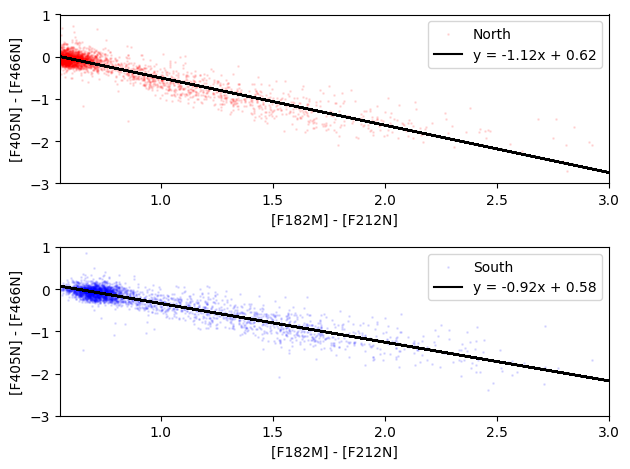

In [16]:
# initialize a linear fitter
fit = fitting.LinearLSQFitter()

small_lim = 0.55

mask = cat_brick_north.color('f182m', 'f212n') > small_lim
x = cat_brick_north.color('f182m', 'f212n')[mask]
y = cat_brick_north.color('f405n', 'f466n')[mask]

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line_1 = fit(line_init, x, y)

# plot
ax = plt.subplot(211)
ax.scatter(x, y, label='North', color='red', s=1, alpha=0.1)
ax.plot(x, fitted_line_1(x), 'k-', label=f'y = {fitted_line_1.slope.value:.2f}x + {fitted_line_1.intercept.value:.2f}')
ax.set(xlabel='[F182M] - [F212N]', ylabel='[F405N] - [F466N]')
ax.legend()
ax.set_xlim(small_lim, 3)
ax.set_ylim(-3, 1)

fit = fitting.LinearLSQFitter()
mask = cat_brick_south.color('f182m', 'f212n') > small_lim
x = cat_brick_south.color('f182m', 'f212n')[mask]
y = cat_brick_south.color('f405n', 'f466n')[mask]
line_init = models.Linear1D()

ax = plt.subplot(212)
ax.scatter(x, y, label='South', color='blue', s=1, alpha=0.1)
fitted_line_2 = fit(line_init, x, y)
ax.plot(x, fitted_line_2(x), 'k-', label=f'y = {fitted_line_2.slope.value:.2f}x + {fitted_line_2.intercept.value:.2f}')
ax.set(xlabel='[F182M] - [F212N]', ylabel='[F405N] - [F466N]')
ax.legend()
ax.set_xlim(small_lim, 3)
ax.set_ylim(-3, 1)

plt.tight_layout()

<WCSAxes: >

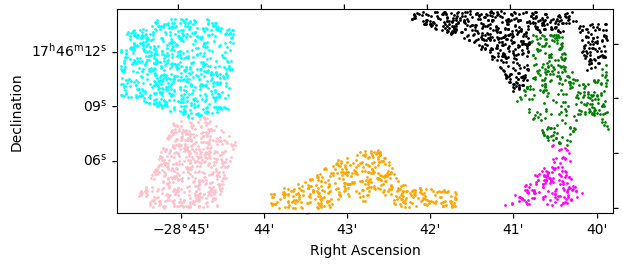

In [17]:
ax = plt.subplot(projection=ww_brick)
plt.imshow(nanfield_brick)

cat_brick_head_rc.plot_position(ax=ax, color='green', s=1, label='Head', transform=ax.get_transform('world'))
cat_brick_sfluff_rc.plot_position(ax=ax, color='cyan', s=1, label='South Fluff', transform=ax.get_transform('world'))
cat_brick_nfluff_rc.plot_position(ax=ax, color='magenta', s=1, label='North Fluff', transform=ax.get_transform('world'))
cat_brick_punch_rc.plot_position(ax=ax, color='orange', s=1, label='Punch', transform=ax.get_transform('world'))
cat_brick_sfore_rc.plot_position(ax=ax, color='pink', s=1, label='South Foreground', transform=ax.get_transform('world'))
cat_brick_nclear_rc.plot_position(ax=ax, color='k', s=1, label='North Clear', transform=ax.get_transform('world'))

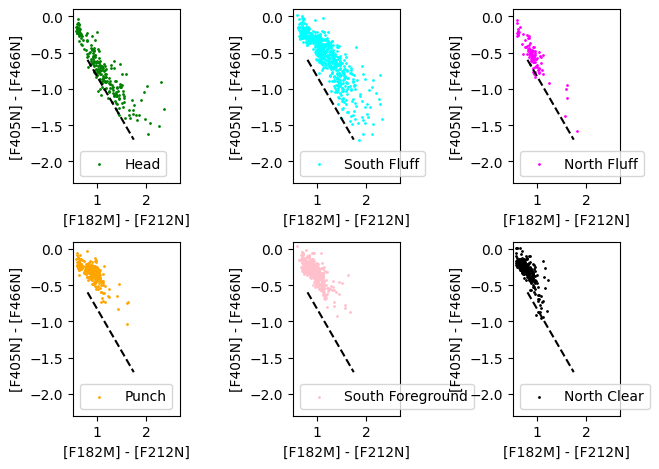

In [18]:
ax1 = plt.subplot(231)
cat_brick_head_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='green', s=1, label='Head', ax=ax1)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax1.set_xlim(0.5, 2.7)
ax1.set_ylim(-2.3, 0.1)
plt.legend()

ax2 = plt.subplot(232)
cat_brick_sfluff_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='cyan', s=1, label='South Fluff', ax=ax2)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax2.set_xlim(0.5, 2.7)
ax2.set_ylim(-2.3, 0.1)
plt.legend()

ax3 = plt.subplot(233)
cat_brick_nfluff_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='magenta', s=1, label='North Fluff', ax=ax3)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax3.set_xlim(0.5, 2.7)
ax3.set_ylim(-2.3, 0.1)
plt.legend()

ax4 = plt.subplot(234)
cat_brick_punch_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='orange', s=1, label='Punch', ax=ax4)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax4.set_xlim(0.5, 2.7)
ax4.set_ylim(-2.3, 0.1)
plt.legend()

ax5 = plt.subplot(235)
cat_brick_sfore_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='pink', s=1, label='South Foreground', ax=ax5)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax5.set_xlim(0.5, 2.7)
ax5.set_ylim(-2.3, 0.1)
plt.legend()

ax6 = plt.subplot(236)
cat_brick_nclear_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='k', s=1, label='North Clear', ax=ax6)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax6.set_xlim(0.5, 2.7)
ax6.set_ylim(-2.3, 0.1)
plt.legend()

plt.tight_layout()

<WCSAxes: >

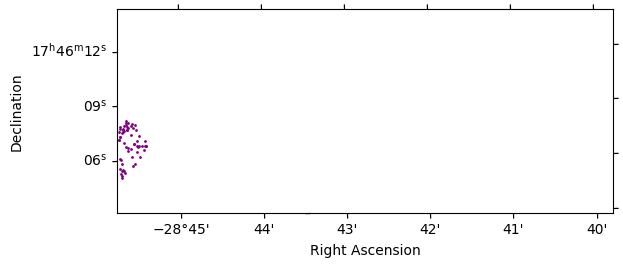

In [19]:
ax = plt.subplot(projection=ww_brick)
plt.imshow(nanfield_brick)

cat_brick_sfr_rc.plot_position(ax=ax, color='purple', s=1, label='Star Forming Region', transform=ax.get_transform('world'))

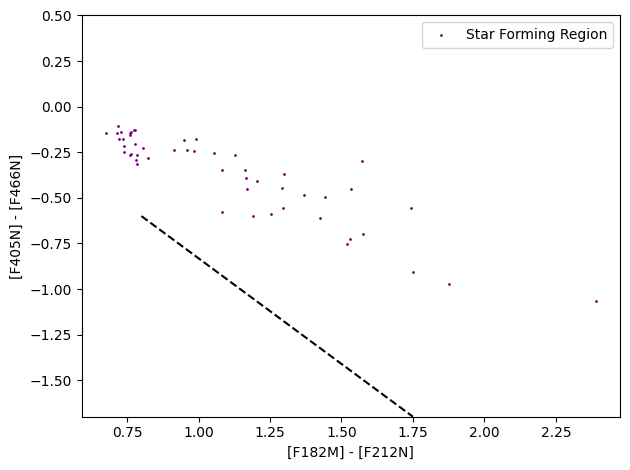

In [20]:
ax = plt.subplot(111)
cat_brick_sfr_rc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='purple', s=1, label='Star Forming Region', ax=ax)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
#ax.set_xlim(0.5, 2.7)
ax.set_ylim(-1.7, 0.5)
plt.legend()

plt.tight_layout()

# Full Catalog

<WCSAxes: >

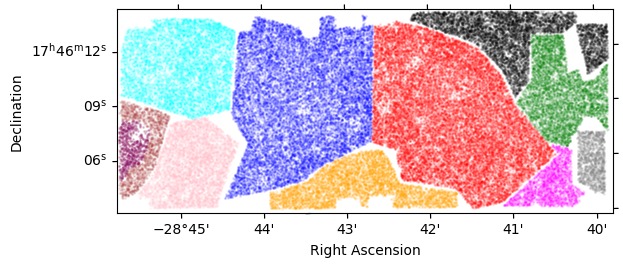

In [21]:
ax = plt.subplot(projection=ww_brick)
plt.imshow(nanfield_brick)

cat_brick_north.plot_position(ax=ax, color='red', s=1, label='North', transform=ax.get_transform('world'), alpha=0.1)
cat_brick_south.plot_position(ax=ax, color='blue', s=1, label='South', transform=ax.get_transform('world'), alpha=0.1)
cat_brick_head.plot_position(ax=ax, color='green', s=1, label='Head', transform=ax.get_transform('world'), alpha=0.1)
cat_brick_sfluff.plot_position(ax=ax, color='cyan', s=1, label='South Fluff', transform=ax.get_transform('world'), alpha=0.1)
cat_brick_nfluff.plot_position(ax=ax, color='magenta', s=1, label='North Fluff', transform=ax.get_transform('world'), alpha=0.1)
cat_brick_punch.plot_position(ax=ax, color='orange', s=1, label='Punch', transform=ax.get_transform('world'), alpha=0.1)
cat_brick_sfore.plot_position(ax=ax, color='pink', s=1, label='South Foreground', transform=ax.get_transform('world'), alpha=0.1)
cat_brick_nclear.plot_position(ax=ax, color='k', s=1, label='North Clear', transform=ax.get_transform('world'), alpha=0.1)
cat_brick_sfrwide.plot_position(ax=ax, color='brown', s=1, label='Star Forming Region Wide', transform=ax.get_transform('world'), alpha=0.1)
cat_brick_sfr.plot_position(ax=ax, color='purple', s=1, label='Star Forming Region', transform=ax.get_transform('world'), alpha=0.1)
cat_brick_topc.plot_position(ax=ax, color='gray', s=1, label='Top Center', transform=ax.get_transform('world'), alpha=0.1)


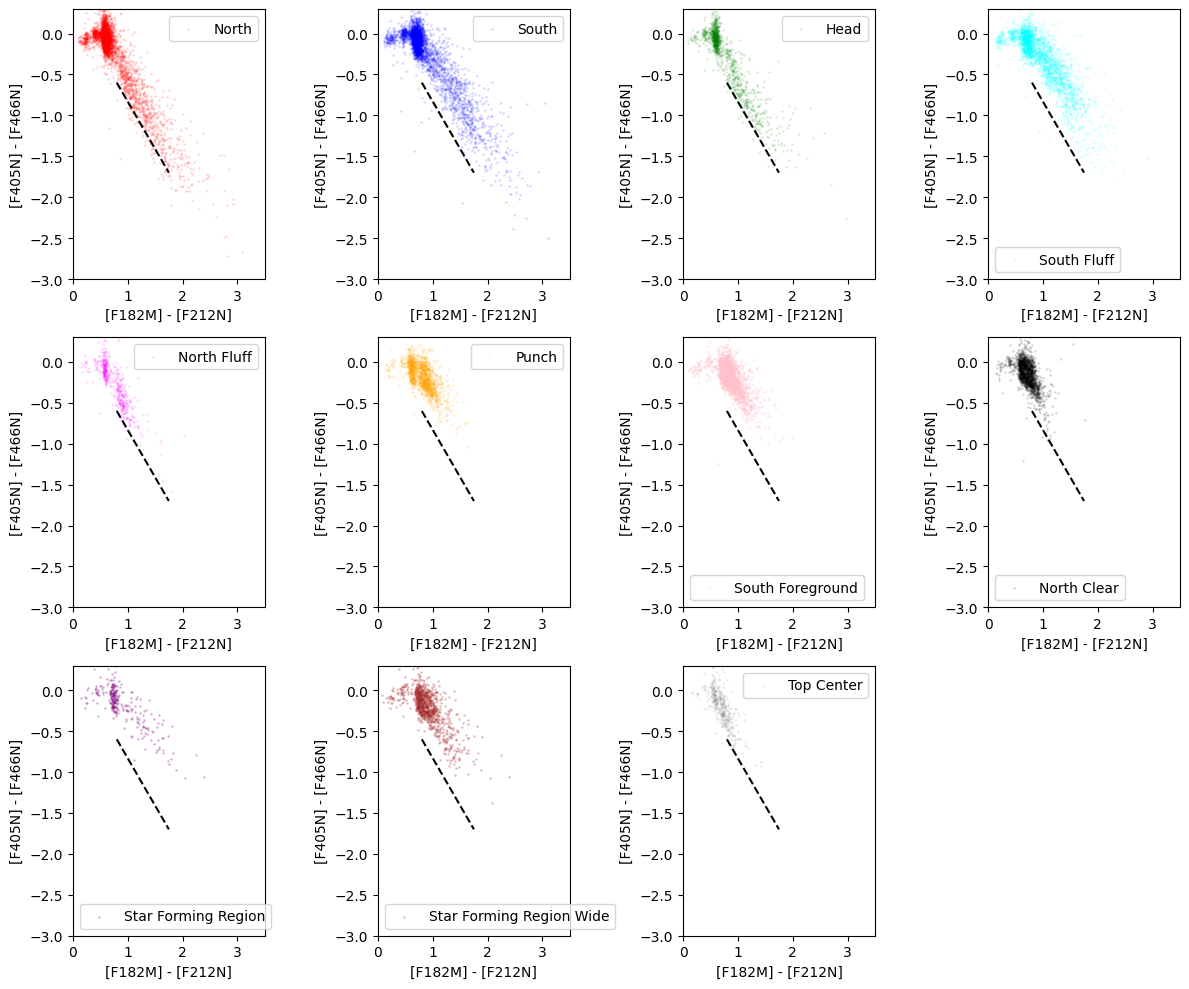

In [22]:
fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot(341)
cat_brick_north.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='red', s=1, label='North', ax=ax1, alpha=0.1)

ax2 = plt.subplot(342)
cat_brick_south.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='blue', s=1, label='South', ax=ax2, alpha=0.1)

ax3 = plt.subplot(343)
cat_brick_head.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='green', s=1, label='Head', ax=ax3, alpha=0.1)

ax4 = plt.subplot(344)
cat_brick_sfluff.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='cyan', s=1, label='South Fluff', ax=ax4, alpha=0.1)

ax5 = plt.subplot(345)
cat_brick_nfluff.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='magenta', s=1, label='North Fluff', ax=ax5, alpha=0.1)

ax6 = plt.subplot(346)
cat_brick_punch.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='orange', s=1, label='Punch', ax=ax6, alpha=0.1)

ax7 = plt.subplot(347)
cat_brick_sfore.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='pink', s=1, label='South Foreground', ax=ax7, alpha=0.2)

ax8 = plt.subplot(348)
cat_brick_nclear.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='k', s=1, label='North Clear', ax=ax8, alpha=0.1)

ax9 = plt.subplot(349)
cat_brick_sfr.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='purple', s=1, label='Star Forming Region', ax=ax9, alpha=0.2)

ax10 = plt.subplot(3,4,10)
cat_brick_sfrwide.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='brown', s=1, label='Star Forming Region Wide', ax=ax10, alpha=0.2)

ax11 = plt.subplot(3,4,11)
cat_brick_topc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='gray', s=1, label='Top Center', ax=ax11, alpha=0.1)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]#, ax12]
for ax in axes:
    plt.sca(ax)
    plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
    ax.set_xlim(0., 3.5)
    ax.set_ylim(-3, 0.3)
    plt.legend()

plt.tight_layout()

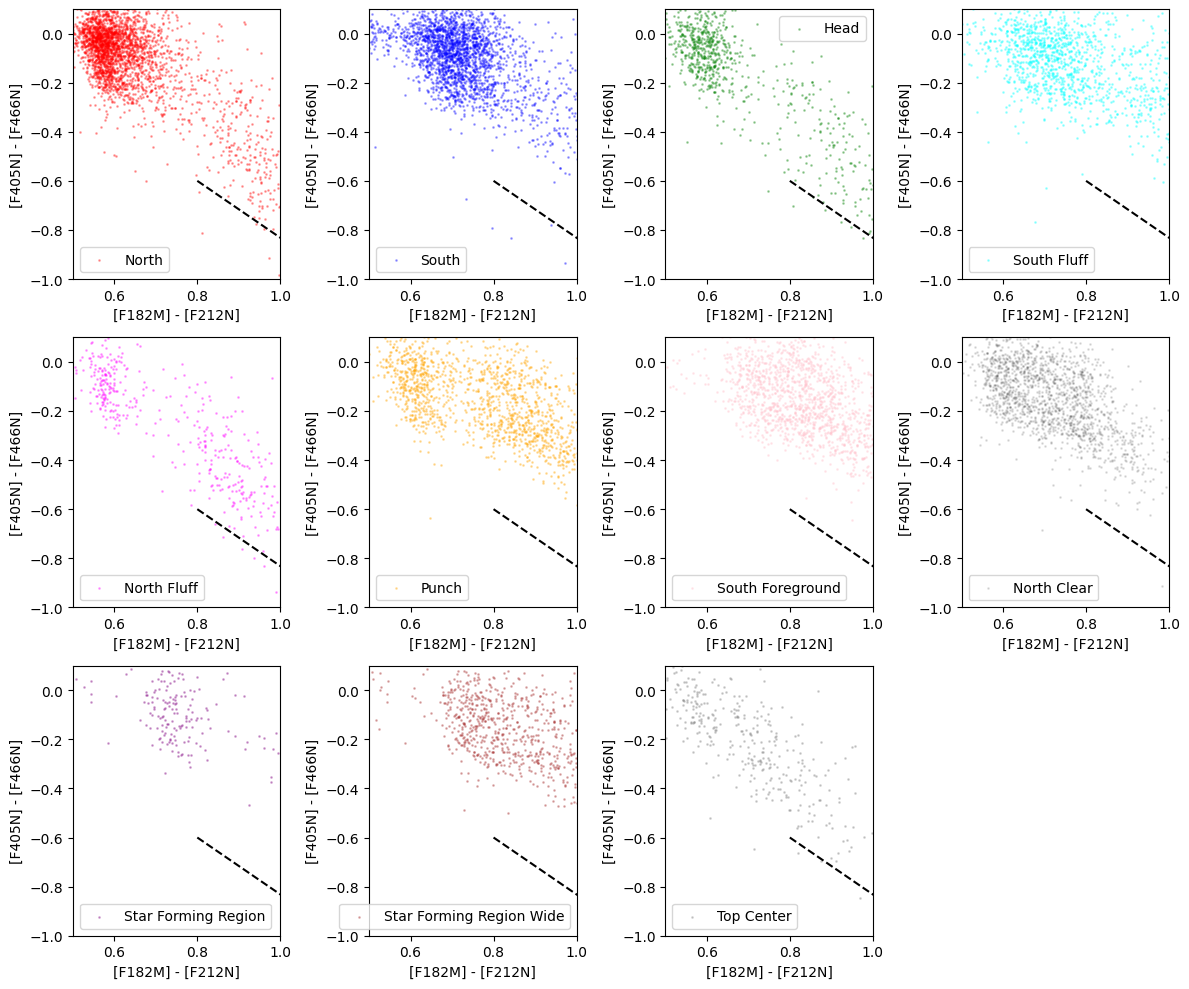

In [32]:
fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot(341)
cat_brick_north.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='red', s=1, label='North', ax=ax1, alpha=0.3)

ax2 = plt.subplot(342)
cat_brick_south.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='blue', s=1, label='South', ax=ax2, alpha=0.3)

ax3 = plt.subplot(343)
cat_brick_head.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='green', s=1, label='Head', ax=ax3, alpha=0.3)

ax4 = plt.subplot(344)
cat_brick_sfluff.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='cyan', s=1, label='South Fluff', ax=ax4, alpha=0.3)

ax5 = plt.subplot(345)
cat_brick_nfluff.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='magenta', s=1, label='North Fluff', ax=ax5, alpha=0.3)

ax6 = plt.subplot(346)
cat_brick_punch.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='orange', s=1, label='Punch', ax=ax6, alpha=0.3)

ax7 = plt.subplot(347)
cat_brick_sfore.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='pink', s=1, label='South Foreground', ax=ax7, alpha=0.3)

ax8 = plt.subplot(348)
cat_brick_nclear.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='k', s=1, label='North Clear', ax=ax8, alpha=0.1)

ax9 = plt.subplot(349)
cat_brick_sfr.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='purple', s=1, label='Star Forming Region', ax=ax9, alpha=0.3)

ax10 = plt.subplot(3,4,10)
cat_brick_sfrwide.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='brown', s=1, label='Star Forming Region Wide', ax=ax10, alpha=0.3)

ax11 = plt.subplot(3,4,11)
cat_brick_topc.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='gray', s=1, label='Top Center', ax=ax11, alpha=0.3)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]#, ax12]
for ax in axes:
    plt.sca(ax)
    plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
    ax.set_xlim(0.5, 1)
    ax.set_ylim(-1, 0.1)
    plt.legend()

plt.tight_layout()

<WCSAxes: >

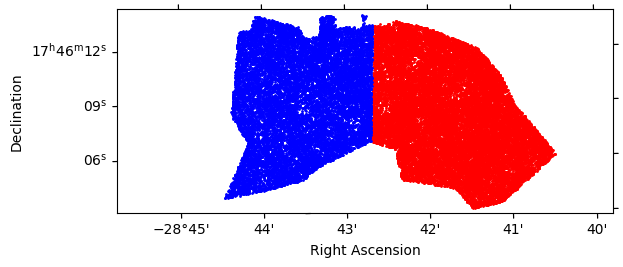

In [23]:
ax = plt.subplot(projection=ww_brick)
plt.imshow(nanfield_brick)

cat_brick_north.plot_position(ax=ax, color='red', s=1, label='North', transform=ax.get_transform('world'))
cat_brick_south.plot_position(ax=ax, color='blue', s=1, label='South', transform=ax.get_transform('world'))

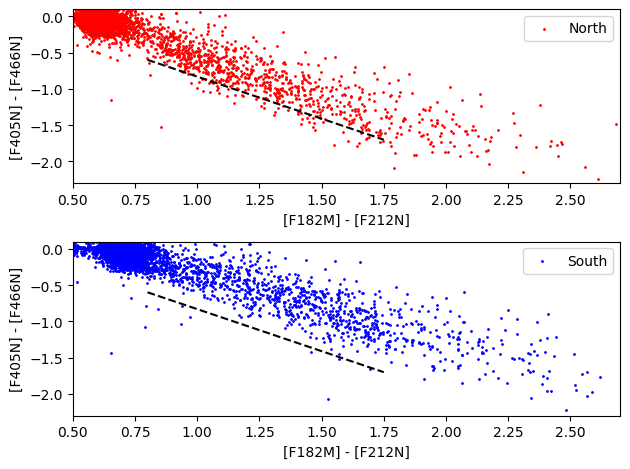

In [24]:
ax1 = plt.subplot(211)
cat_brick_north.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='red', s=1, label='North', ax=ax1)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax1.set_xlim(0.5, 2.7)
ax1.set_ylim(-2.3, 0.1)
plt.legend()

ax2 = plt.subplot(212)
cat_brick_south.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='blue', s=1, label='South', ax=ax2)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax2.set_xlim(0.5, 2.7)
ax2.set_ylim(-2.3, 0.1)
plt.legend()

plt.tight_layout()

<WCSAxes: >

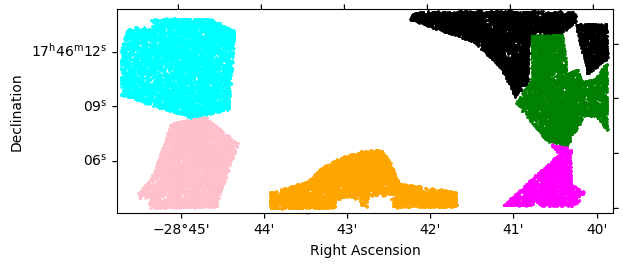

In [25]:
ax = plt.subplot(projection=ww_brick)
plt.imshow(nanfield_brick)

cat_brick_head.plot_position(ax=ax, color='green', s=1, label='Head', transform=ax.get_transform('world'))
cat_brick_sfluff.plot_position(ax=ax, color='cyan', s=1, label='South Fluff', transform=ax.get_transform('world'))
cat_brick_nfluff.plot_position(ax=ax, color='magenta', s=1, label='North Fluff', transform=ax.get_transform('world'))
cat_brick_punch.plot_position(ax=ax, color='orange', s=1, label='Punch', transform=ax.get_transform('world'))
cat_brick_sfore.plot_position(ax=ax, color='pink', s=1, label='South Foreground', transform=ax.get_transform('world'))
cat_brick_nclear.plot_position(ax=ax, color='k', s=1, label='North Clear', transform=ax.get_transform('world'))

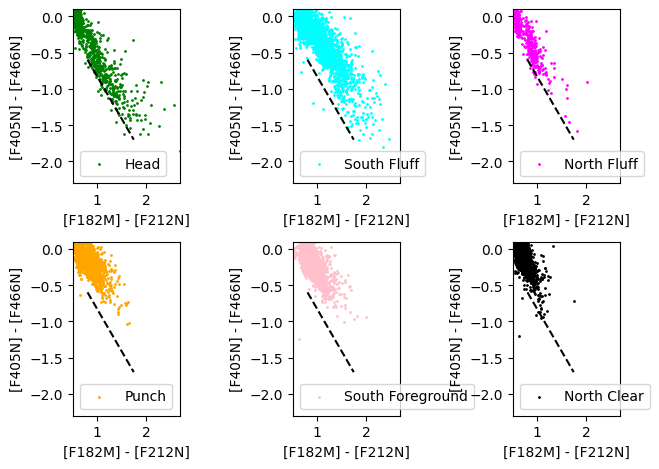

In [26]:
ax1 = plt.subplot(231)
cat_brick_head.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='green', s=1, label='Head', ax=ax1)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax1.set_xlim(0.5, 2.7)
ax1.set_ylim(-2.3, 0.1)
plt.legend()

ax2 = plt.subplot(232)
cat_brick_sfluff.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='cyan', s=1, label='South Fluff', ax=ax2)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax2.set_xlim(0.5, 2.7)
ax2.set_ylim(-2.3, 0.1)
plt.legend()

ax3 = plt.subplot(233)
cat_brick_nfluff.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='magenta', s=1, label='North Fluff', ax=ax3)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax3.set_xlim(0.5, 2.7)
ax3.set_ylim(-2.3, 0.1)
plt.legend()

ax4 = plt.subplot(234)
cat_brick_punch.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='orange', s=1, label='Punch', ax=ax4)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax4.set_xlim(0.5, 2.7)
ax4.set_ylim(-2.3, 0.1)
plt.legend()

ax5 = plt.subplot(235)
cat_brick_sfore.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='pink', s=1, label='South Foreground', ax=ax5)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax5.set_xlim(0.5, 2.7)
ax5.set_ylim(-2.3, 0.1)
plt.legend()

ax6 = plt.subplot(236)
cat_brick_nclear.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='k', s=1, label='North Clear', ax=ax6)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
ax6.set_xlim(0.5, 2.7)
ax6.set_ylim(-2.3, 0.1)
plt.legend()

plt.tight_layout()

<WCSAxes: >

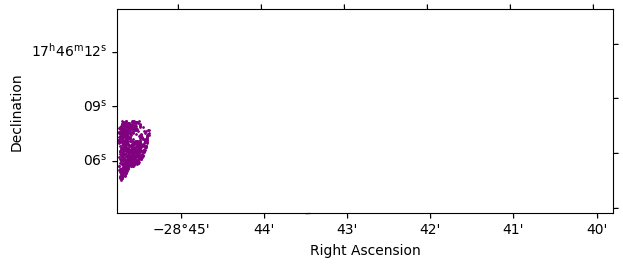

In [27]:
ax = plt.subplot(projection=ww_brick)
plt.imshow(nanfield_brick)

cat_brick_sfr.plot_position(ax=ax, color='purple', s=1, label='Star Forming Region', transform=ax.get_transform('world'))

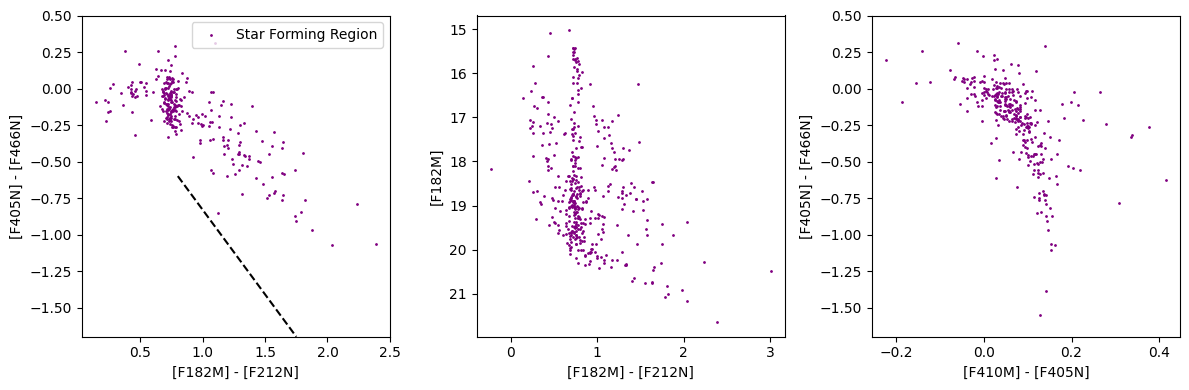

In [28]:
fig = plt.figure(figsize=(12,4))

ax = plt.subplot(131)
cat_brick_sfr.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='purple', s=1, label='Star Forming Region', ax=ax)
plt.plot([0.8, 1.75], [-0.6, -1.7], color='k', linestyle='dashed')
#ax.set_xlim(0.5, 2.7)
ax.set_ylim(-1.7, 0.5)
plt.legend()

ax2 = plt.subplot(132)
cat_brick_sfr.plot_CMD('f182m', 'f212n', 'f182m', color='purple', s=1, label='Star Forming Region', ax=ax2)

ax3 = plt.subplot(133)
cat_brick_sfr.plot_CCD('f410m', 'f405n', 'f405n', 'f466n', color='purple', s=1, label='Star Forming Region', ax=ax3)
ax3.set_ylim(-1.7, 0.5)

plt.tight_layout()